In [1]:
from __future__ import print_function, division
import numpy as np
import emcee
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
sample = 'sample_3'
_temp = __import__(sample+'_fitting_params')
params = _temp.params

nwalkers = params['nwalkers']
mag_lim = params['mag_lim']

In [42]:
reader = emcee.backends.HDFBackend("chains/"+sample+"_chain.hdf5")
data = reader.get_chain()

nsteps = len(data)
print(nsteps, nwalkers)

868 100


In [43]:
p1 = data.T[0]
p2 = data.T[1]
p3 = data.T[2]
p4 = data.T[3]
p5 = data.T[4]
p6 = data.T[5]
p7 = data.T[6]
p8 = data.T[7]
p9 = data.T[8]

In [44]:
print(np.percentile(p1[:,-1],[16, 50, 84]))
print(np.percentile(p2[:,-1],[16, 50, 84]))
print(np.percentile(p3[:,-1],[16, 50, 84]))
print(np.percentile(p4[:,-1],[16, 50, 84]))
print(np.percentile(p5[:,-1],[16, 50, 84]))
print(np.percentile(p6[:,-1],[16, 50, 84]))
print(np.percentile(p7[:,-1],[16, 50, 84]))
print(np.percentile(p8[:,-1],[16, 50, 84]))
print(np.percentile(p9[:,-1],[16, 50, 84]))

[0.00837136 0.02937324 0.05759881]
[0.74990416 0.76363156 0.77607156]
[0.01500462 0.04333531 0.07918778]
[0.05244672 0.05988224 0.06840341]
[0.19505587 0.24955089 0.34874535]
[0.20745868 0.37690542 0.46081384]
[0.03795082 0.09206366 0.14080199]
[0.07505167 0.13777673 0.1751899 ]
[0.72740617 0.8102866  0.86291555]


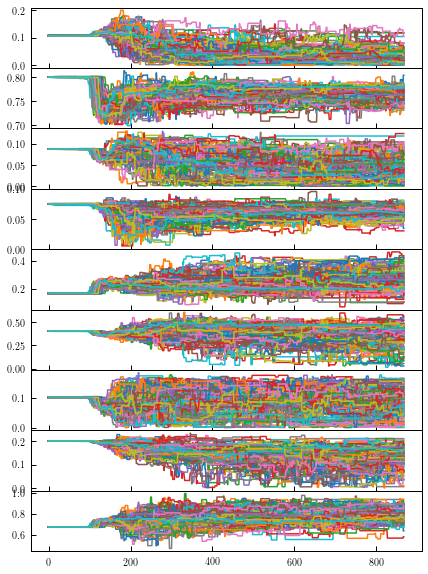

In [45]:
fig, axes = plt.subplots(9, 1, figsize=(7.0,10.0),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(0,nwalkers):
    axes[0].plot(p1[i])
#axes[0].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[1].plot(p2[i])
#axes[1].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[2].plot(p3[i])
#axes[2].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[3].plot(p4[i])
#axes[3].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[4].plot(p5[i])
#axes[4].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[5].plot(p6[i])
#axes[5].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[6].plot(p7[i])
#axes[6].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[7].plot(p8[i])
#axes[7].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[8].plot(p9[i])
#axes[8].set_ylim([0,1])

#axes[0].set_xlim([470,550])

plt.show()

In [15]:
from make_mock import make_galaxy_sample

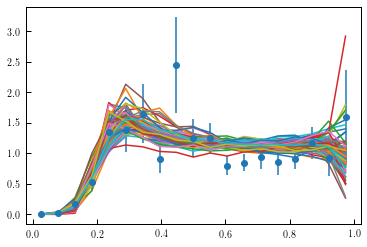

In [16]:
from astropy.table import Table
t_1 = Table.read('../data/'+sample+'_shapes.dat', format='ascii')

j = -1
for i in range(nwalkers):
    d = {'disk_shape_mu_1_centrals': p1[i,j],
         'disk_shape_mu_2_centrals': p2[i,j],
         'disk_shape_sigma_1_centrals': p3[i,j],
         'disk_shape_sigma_2_centrals': p4[i,j],
         'elliptical_shape_mu_1_centrals': p5[i,j],
         'elliptical_shape_mu_2_centrals': p6[i,j],
         'elliptical_shape_sigma_1_centrals': p7[i,j],
         'elliptical_shape_sigma_2_centrals': p8[i,j],
         'f_disk': p9[i,j]}
    
    mock = make_galaxy_sample(mag_lim=mag_lim,**d)
    
    # measure shape distribution
    bins = np.linspace(0,1,20)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    x = mock['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(mask)/np.diff(bins)
    
    plt.plot(bin_centers, counts)
plt.errorbar(t_1['q'],t_1['frequency'],t_1['err'], fmt='o')
plt.show()

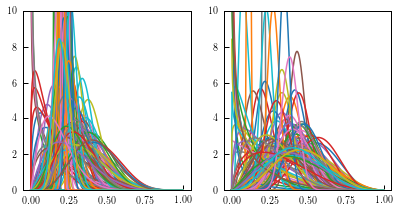

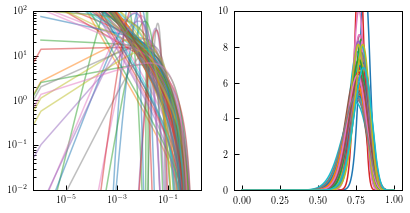

In [56]:
from galaxy_shapes.shape_models.shape_model_components import EllipticalGalaxyShapes, DiskGalaxyShapes
elliptical_shape_model = EllipticalGalaxyShapes()
disk_shape_model       = DiskGalaxyShapes()

fig, axes = plt.subplots(1, 2, figsize=(6.6,3.3))
#plt.subplots_adjust(wspace=0, hspace=0)
x = np.linspace(0,1,1000)
j = -1
for i in range(nwalkers):
    d = {'disk_shape_mu_1_centrals': p1[i,j],
         'disk_shape_mu_2_centrals': p2[i,j],
         'disk_shape_sigma_1_centrals': p3[i,j],
         'disk_shape_sigma_2_centrals': p4[i,j],
         'elliptical_shape_mu_1_centrals': p5[i,j],
         'elliptical_shape_mu_2_centrals': p6[i,j],
         'elliptical_shape_sigma_1_centrals': p7[i,j],
         'elliptical_shape_sigma_2_centrals': p8[i,j],
         'f_disk': p9[i,j]}
    
    for key in elliptical_shape_model.param_dict.keys():
        elliptical_shape_model.param_dict[key] = d[key]
    
    p = elliptical_shape_model.epsilon_pdf(x)
    axes[0].plot(x,p)
    axes[0].set_ylim([0,10])
    p = elliptical_shape_model.gamma_prime_pdf(x)
    axes[1].plot(x,p)
    axes[1].set_ylim([0,10])
    
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(6.6,3.3))
#plt.subplots_adjust(wspace=0, hspace=0)
x = np.linspace(0,1,1000000)
j = -1
for i in range(nwalkers):
    d = {'disk_shape_mu_1_centrals': p1[i,j],
         'disk_shape_mu_2_centrals': p2[i,j],
         'disk_shape_sigma_1_centrals': p3[i,j],
         'disk_shape_sigma_2_centrals': p4[i,j],
         'elliptical_shape_mu_1_centrals': p5[i,j],
         'elliptical_shape_mu_2_centrals': p6[i,j],
         'elliptical_shape_sigma_1_centrals': p7[i,j],
         'elliptical_shape_sigma_2_centrals': p8[i,j],
         'f_disk': p9[i,j]}
    
    for key in disk_shape_model.param_dict.keys():
        disk_shape_model.param_dict[key] = d[key]
    
    p = disk_shape_model.epsilon_pdf(x)
    axes[0].plot(x,p, alpha=0.5)
    axes[0].set_ylim([0.01,100])
    axes[0].set_yscale('log')
    axes[0].set_xscale('log')
    p = disk_shape_model.gamma_prime_pdf(x)
    axes[1].plot(x,p)
    axes[1].set_ylim([0.,10])

plt.show()

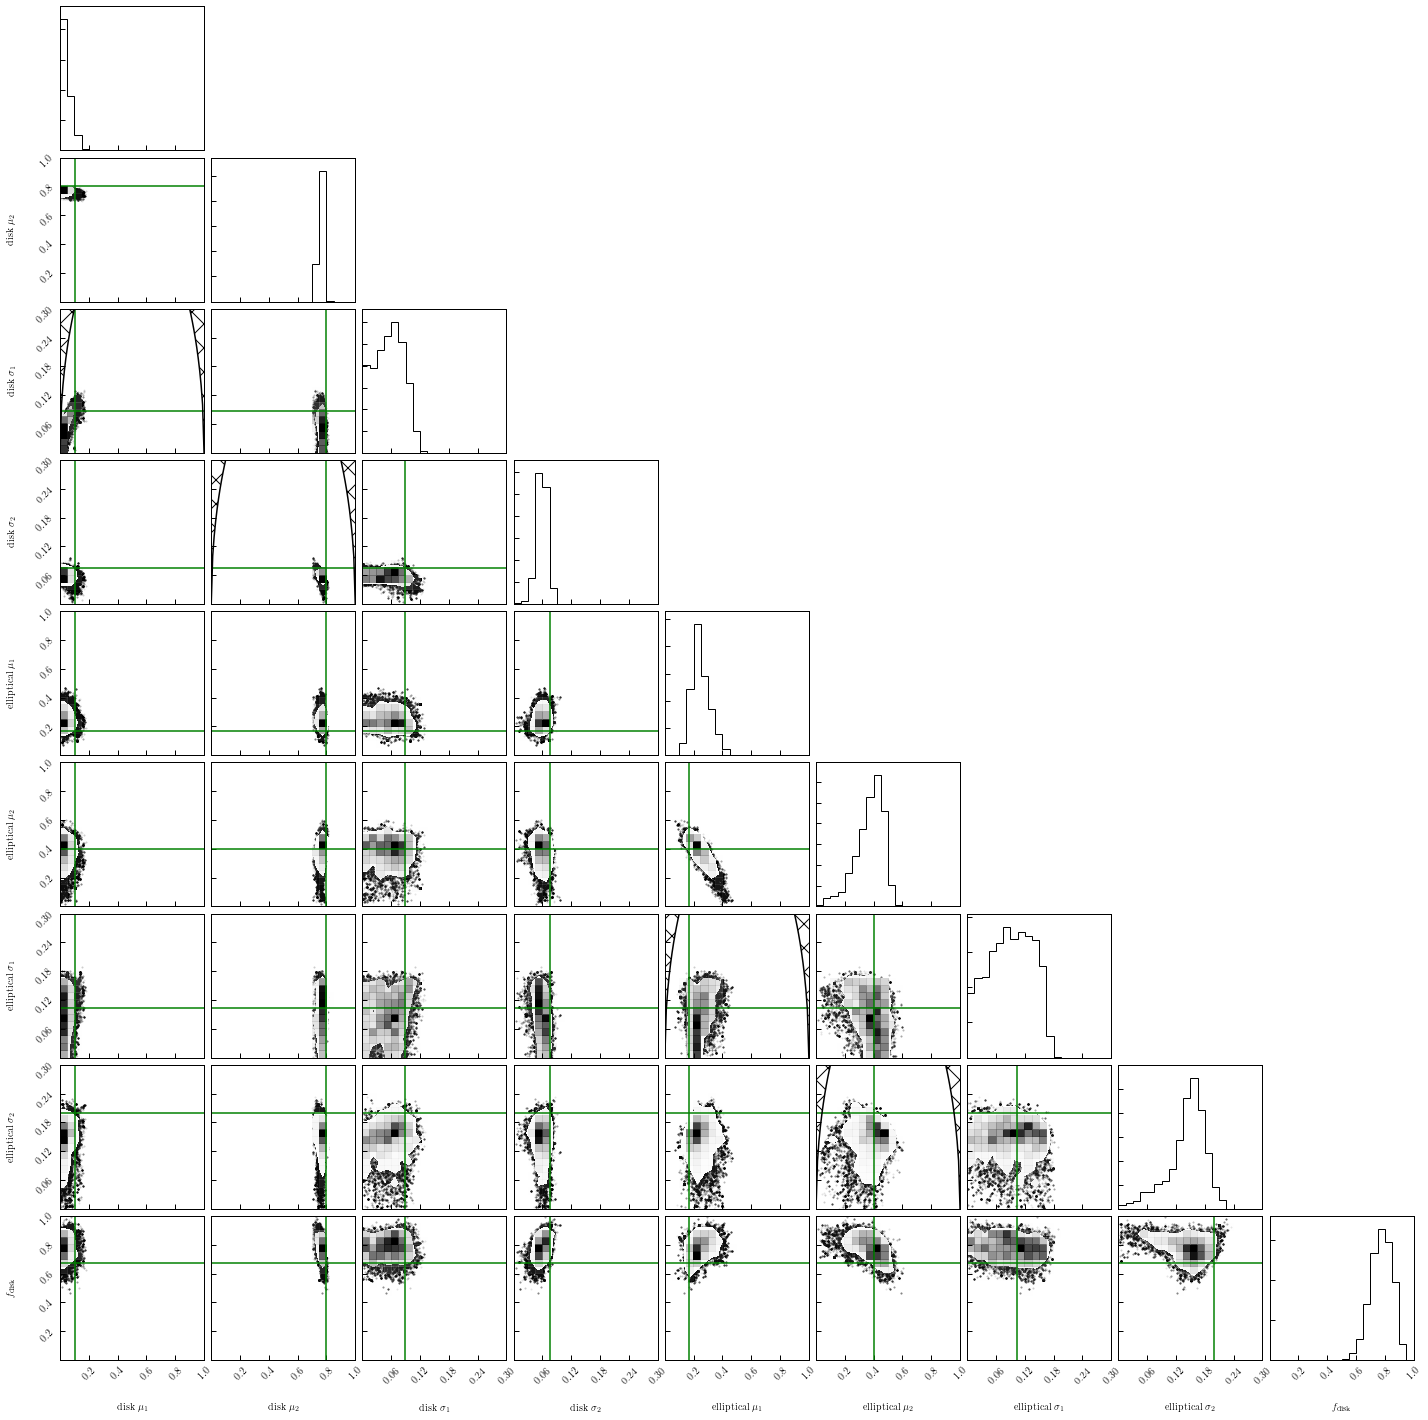

In [55]:
samples = data.T[:,:,-1].T
samples = reader.get_chain(discard=200, flat=True)

ranges = [(0,1),(0,1),(0,.3),(0,.3),(0,1),(0,1),(0,.3),(0,.3),(0,1)]
names = ['disk ' + r'$\mu_1$','disk ' + r'$\mu_2$','disk ' + r'$\sigma_1$','disk ' + r'$\sigma_2$',
         'elliptical ' + r'$\mu_1$','elliptical ' + r'$\mu_2$','elliptical ' + r'$\sigma_1$','elliptical ' + r'$\sigma_2$',
         r'$f_{\rm disk}$']

import corner
fig = corner.corner(samples, range=ranges, labels=names, plot_contours=False)

ndim = 9

# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        x,y = params['theta0'][xi], params['theta0'][yi]
        ax.axvline(x, color="g")
        ax.axhline(y, color="g")
        ax.plot(x,y,"g")

# show not allowed regions
xx = np.linspace(0,1,100) # mu
yy = np.sqrt((xx*(1.0-xx))) # sigma
        
ax = axes[2, 0]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

ax = axes[3, 1]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

ax = axes[6, 4]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

ax = axes[7, 5]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

plt.show()

In [16]:
np.shape(samples)

(100, 9)

In [48]:
data.T[:,:,480]

array([[5.67673652e-02, 4.23328052e-02, 2.14641978e-02, 4.49589443e-02,
        1.00583739e-01, 3.02579731e-02, 2.81958065e-02, 1.03303751e-01,
        3.39052123e-02, 2.47684806e-02, 3.36365988e-02, 4.10023789e-02,
        4.56646567e-02, 3.91662546e-02, 1.42760060e-01, 8.58374657e-02,
        2.57371300e-02, 5.88453586e-02, 3.28695519e-02, 3.12808059e-02,
        2.98188291e-02, 5.92633271e-02, 5.97176790e-02, 3.03489914e-02,
        3.41333264e-02, 9.23467373e-02, 3.12386974e-02, 8.15259292e-03,
        8.52162069e-02, 2.68337347e-02, 6.72516741e-02, 1.31138704e-01,
        1.01120099e-01, 1.58023100e-01, 4.48363401e-02, 3.01728497e-02,
        5.28585312e-02, 6.56540118e-02, 1.15290752e-01, 6.68262498e-03,
        9.58831191e-02, 8.74037838e-02, 4.16452497e-02, 1.51892921e-02,
        6.49736435e-02, 2.09730424e-02, 5.58473146e-02, 4.98754141e-02,
        3.52773438e-02, 2.28251115e-02, 3.61017781e-01, 5.50964537e-02,
        4.02820032e-02, 2.89572101e-02, 2.96724424e-02, 7.944333

In [12]:
np.sqrt(-1)/2.0

/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [105]:
def projected_b_to_a(b_to_a, c_to_a, theta, phi):
        r"""
        Calulate the projected minor-to-major semi-axis lengths ratios
        for the 2D projectyion of an 3D ellipsodial distributions.

        Parameters
        ----------
        b_to_a : array_like
            array of intermediate axis ratios, b/a

        c_to_a : array_like
            array of minor axis ratios, c/a

        theta : array_like
            orientation angle, where cos(theta) is bounded between :math:`[0,1]`

        phi : array_like
            orientation angle, where phi is bounded between :math:`[0,2\pi]`

        Returns
        -------
        proj_b_to_a : numpy.array
            array of projected minor-to-major axis ratios

        Notes
        -----
        """

        # gamma
        g = c_to_a
        # ellipticity
        e = 1.0 - b_to_a

        V = (1 - e*(2 - e)*np.sin(phi)**2)*np.cos(theta)**2 + g**2*np.sin(theta)**2
        W = 4*e**2*(2-e)**2*np.cos(theta)**2*np.sin(phi)**2*np.cos(phi)**2
        Z = 1-e*(2-e)*np.cos(phi)**2

        projected_b_to_a = np.sqrt((V+Z-np.sqrt((V-Z)**2+W))/(V+Z+np.sqrt((V-Z)**2+W)))
        print(np.all(V>0),np.all(Z>0),np.all(W>0))
        return projected_b_to_a

In [107]:
N = 10**6
b = np.random.random(N)
c = np.random.random(N)
theta = np.arccos(np.random.random(N))
phi = np.random.random(N)*np.pi*2
result = projected_b_to_a(b, c, theta, phi)
np.sum(np.isnan(result))

True True True


0

1.0

In [7]:
mock

gal_type,Mag_r,disk,elliptical,galaxy_axisA_x,galaxy_axisA_y,galaxy_axisA_z,galaxy_axisB_x,galaxy_axisB_y,galaxy_axisB_z,galaxy_axisC_x,galaxy_axisC_y,galaxy_axisC_z,galaxy_b_to_a,galaxy_c_to_a,galaxy_c_to_b,galaxy_projected_b_to_a,galaxy_theta,galaxy_phi,deltaMag_u,deltaMag_g,deltaMag_r,deltaMag_i,deltaMag_z,obs_Mag_r
str8,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
centrals,-21.199120892579217,True,False,-0.9049305723635843,-0.3681621544563632,0.2134415311689943,-0.049362961667622454,-0.40735937275095335,-0.9119329138962748,0.4226865945557264,-0.835772079850721,0.3504583760232922,0.9847956454473021,0.2861697224280606,0.2905879242571996,0.44741729763341426,1.2127358523480207,3.3715079183978807,0.7240280537758713,0.5646508092340129,0.4189344713671708,0.3642908446671051,0.29598631129202285,-20.780186421212047
centrals,-17.54330474870472,True,False,-0.9989270543561546,0.04623344322152192,-0.002684921454782108,-0.045523404838158095,-0.9696309564970863,0.24029862216518558,0.008506449745764132,0.24016302157165612,0.9706952989390105,0.8515391979151686,0.1592820202275155,0.18705189451934467,0.8765576932718654,0.24268892753644195,0.011172805356375992,0.020538147106121504,0.016017171328044442,0.011883707759516844,0.010333658921318996,0.008396097873571684,-17.531421040945204
centrals,-18.007971393181382,True,False,0.6756963280684243,0.7174056258881178,0.16959846750170332,-0.21584975526512626,-0.027440763459710343,0.9760409251935768,0.7048711622607592,-0.6961150569013905,0.1363102056646545,0.924077414641734,0.10524136857176902,0.11388804325725377,0.18495240961479198,1.4340604341797518,6.111141459360278,1.3760998868333905,1.0731848174046568,0.7962338967841002,0.6923773015513914,0.5625565575105056,-17.211737496397284
centrals,-18.683216551979505,True,False,-0.6516566788807264,-0.7426388562385434,-0.1543732556981611,-0.6803031820412382,0.4822234782584003,0.5519493613737914,-0.33545663411938625,0.4647021048167075,-0.819463727326728,0.9935881552039555,0.21010351400490077,0.21145935859286935,0.8328142031274688,2.5312710292322365,0.2727187617947582,0.1374877217353146,0.1072231289004969,0.07955264402294931,0.06917621219386898,0.05620567240751854,-18.603663907956555
centrals,-18.62879457038029,True,False,-0.8308941391504028,0.4391414648868314,0.34171582249371873,-0.5524344110515967,-0.577573395891321,-0.6010201276535112,-0.06656689125674038,-0.688159680725059,0.7224992060983862,0.9997439029140224,0.2602014505680259,0.2602681044711539,0.7446588905061026,0.763385950778633,3.658573406294348,0.22444857499917104,0.17504165597419627,0.1298696157227908,0.11293010062851372,0.0917557067606674,-18.4989249546575
centrals,-17.374582088002544,True,False,-0.8325897700855031,-0.5478227022727078,-0.0817591684375341,0.4452416465911159,-0.5741379022190266,-0.687113924597928,0.3294755694885447,-0.6084866112825847,0.7219348260058076,0.9598289982846743,0.15887669543844704,0.1655260423704411,0.7598300398776553,0.7642019222606931,3.0231602512427234,0.2249881917562071,0.17546248916836277,0.13018184680233366,0.11320160591507276,0.09197630480599661,-17.24440024120021
centrals,-17.141621874087534,True,False,-0.0664854891009908,0.1298580888821135,0.9893010444201943,-0.7480358584257906,-0.662642307320162,0.03670867824646449,0.660319645511318,-0.7375920615769241,0.14119460489165445,0.9456866431028961,0.12222990386397896,0.12924989980077328,0.18021860752169871,1.4291283218941178,4.749477635192809,1.3517892171069679,1.0542255529639246,0.782167345747428,0.6801455180412417,0.5526182334085088,-16.359454528340105
centrals,-17.769595965701402,True,False,-0.6315682788702482,-0.6063065970756251,0.4832326763241989,0.244736400716003,0.4355015484498092,0.8662808409877218,-0.7356803676118103,0.6653801256728323,-0.12666366910111765,0.8115559736452951,0.22194996156869556,0.273486942091936,0.29109211868996177,1.697801156748958,5.774354657520826,1.42678

In [21]:
np.all(mock['galaxy_b_to_a']<1)

True